## Bike Sharing Demand Analysis

In [1]:
#import necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#check working directory

os.getcwd()

'C:\\Users\\jeeva\\Documents\\Yamuna\\Learning\\Python\\Analytics\\PracticeProject\\1569583467_hour\\BikeSharing'

### 1. Load the data file.

In [3]:
#read the Bikesharing dataset

BikeSharing = pd.read_csv("hour.csv")
BikeSharing

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
#view the dataset shape

BikeSharing.shape

(17379, 17)

In [5]:
#view all the columns present in the dataset

BikeSharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
#view the datatype of all columns present in the dataset

BikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### 2. Check for null values in the data and drop records with NAs.

In [7]:
#view the null values in the dataframe

BikeSharing.isnull()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17375,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#view the number of Null values in each column

print("Number of Null Values in each column")
NullValues = BikeSharing.isnull().sum(axis=0)
NullValues

Number of Null Values in each column


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 3. Sanity checks:
#### 3.1. Check if registered + casual = cnt for all the records. If not, the row is junk and should be dropped.

In [9]:
#filter the records with the condition 'Check if registered + casual = cnt for all the records'.

BikeSharing_filtered = BikeSharing[(BikeSharing.registered + BikeSharing.casual == BikeSharing.cnt)]
BikeSharing_filtered

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [10]:
#View the number of records with registered + casual == cnt.

BikeSharing_filtered.shape

(17379, 17)

#### 3.2. Month values should be 1-12 only

In [11]:
#filter the records with following condition 'Month values should be 1-12 only'.

BikeSharing_filtered = BikeSharing_filtered[(BikeSharing_filtered.mnth <= 12)]
BikeSharing_filtered

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [12]:
#View the number of records with Month between 1-12.

BikeSharing_filtered.shape

(17379, 17)

#### 3.3. Hour values should be 0-23

In [13]:
#filter the records with following condition 'Hour values should be 0-23'.

BikeSharing_filtered = BikeSharing_filtered[(BikeSharing_filtered.hr <= 23)]
BikeSharing_filtered

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [14]:
#View the number of records with Hour value between 0-23.

BikeSharing_filtered.shape

(17379, 17)

### 4. The variables ‘casual’ and ‘registered’ are redundant and need to be dropped. ‘Instant’ is the index and needs to be dropped too. The date column dteday will not be used in the model building, and therefore needs to be dropped. Create a new dataframe named inp1.

In [15]:
#drop the following columns 'casual, registered, instant, dteday'
#create a new dataframe inp1 with all the other columns.

inp1 = pd.DataFrame(BikeSharing_filtered.drop(['dteday','casual','registered','instant'],axis=1))
inp1

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


### 5. Univariate analysis: 
#### 5.1. Describe the numerical fields in the dataset using pandas describe method.

In [16]:
#view the descriptive statistics of the dataframe

inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


#### 5.2. Make density plot for temp. This would give a sense of the centrality and the spread of the distribution.

<AxesSubplot:xlabel='temp', ylabel='Density'>

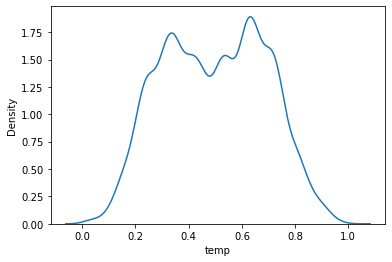

In [17]:
#view density plot for temperature

sns.kdeplot(inp1['temp'])

#### 5.3. Boxplot for atemp
##### Are there any outliers?

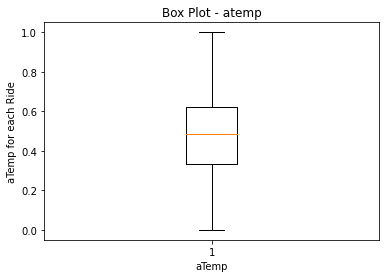

In [18]:
#view Boxplot for atemp

plt.title('Box Plot - atemp')
plt.xlabel('aTemp')
plt.ylabel('aTemp for each Ride')
plt.boxplot(inp1.atemp)
plt.show()

#### Insight: Boxplot for aTemp.
##### - There are no Outliers. 

#### 5.4. Histogram for hum
##### Do you detect any abnormally high values?

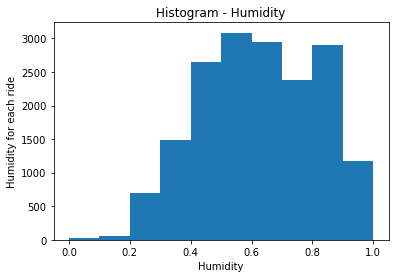

In [19]:
#view Histogram for humidity

plt.title('Histogram - Humidity')
plt.xlabel('Humidity')
plt.ylabel('Humidity for each ride')
plt.hist(inp1.hum)
plt.show()

##### Humidity reached upto 3000 at times at 0.5

#### 5.5. Density plot for windspeed

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

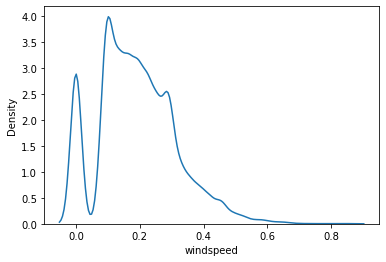

In [20]:
#view density plot for Windspeed

sns.kdeplot(inp1['windspeed'])

#### 5.6. Box and density plot for cnt – this is the variable of interest 
#### 5.6.1. Do you see any outliers in the boxplot? 

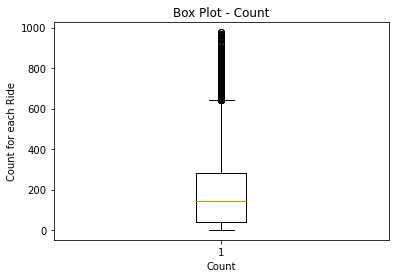

In [21]:
#view Boxplot for count

plt.title('Box Plot - Count')
plt.xlabel('Count')
plt.ylabel('Count for each Ride')
plt.boxplot(inp1.cnt)
plt.show()

#### Boxplot for count Insight: Count > 650 are outliers. Meadian lies at 150

#### 5.6.2. Does the density plot provide a similar insight?

<AxesSubplot:xlabel='cnt', ylabel='Density'>

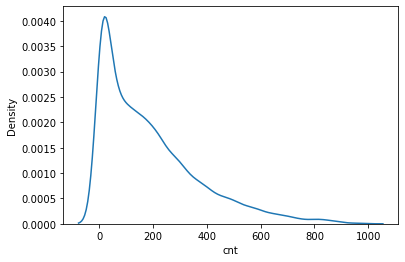

In [22]:
#view density plot for Count

sns.kdeplot(inp1['cnt'])

#### The density plot for count Insight: Yes density plot provide similar insight as Box plot

#### 6.Outlier treatment:
#### 6.1. Cnt looks like some hours have rather high values. You’ll need to treat these outliers so that they don’t skew the analysis and the model.
##### 6.1.1. Find out the following percentiles: 10, 25, 50, 75, 90, 95, 99

In [23]:
#View the percentiles for Count - 1, 10, 25, 50, 70, 90, 95, 99

print(f'Count - 1st percentile : {np.percentile(inp1.cnt,1)}')
print(f'Count - 10th percentile : {np.percentile(inp1.cnt,10)}')
print(f'Count - 25th percentile : {np.percentile(inp1.cnt,25)}')
print(f'Count - 50th percentile : {np.percentile(inp1.cnt,50)}')
print(f'Count - 70th percentile : {np.percentile(inp1.cnt,70)}')
print(f'Count - 90th percentile : {np.percentile(inp1.cnt,90)}')
print(f'Count - 95th percentile : {np.percentile(inp1.cnt,95)}')
print(f'Count - 99th percentile : {np.percentile(inp1.cnt,99)}')

Count - 1st percentile : 2.0
Count - 10th percentile : 9.0
Count - 25th percentile : 40.0
Count - 50th percentile : 142.0
Count - 70th percentile : 244.0
Count - 90th percentile : 451.2000000000007
Count - 95th percentile : 563.0999999999985
Count - 99th percentile : 782.2200000000012


#### 6.1.2. Decide the cutoff percentile and drop records with values higher than the cutoff. Name the new dataframe as inp2.

In [24]:
#View the Records with count less than 1st percentile

inp1[inp1.cnt < np.percentile(inp1.cnt,1)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
30,1,0,1,7,0,0,0,2,0.40,0.4091,0.76,0.1940,1
49,1,0,1,4,0,1,1,1,0.16,0.1364,0.47,0.3881,1
71,1,0,1,2,0,2,1,1,0.14,0.1515,0.63,0.1343,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16879,4,1,12,2,0,2,1,2,0.40,0.4091,0.66,0.3284,1
17215,1,1,12,4,1,2,0,2,0.24,0.2576,0.87,0.0896,1
17237,1,1,12,2,0,3,1,2,0.26,0.2273,0.65,0.2985,1
17262,1,1,12,3,0,4,1,2,0.24,0.2273,0.87,0.2239,1


In [25]:
#View the Records with count more than 99th percentile

inp1[inp1.cnt > np.percentile(inp1.cnt,99)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
10527,1,1,3,18,0,1,1,1,0.64,0.6212,0.57,0.2537,801
10551,1,1,3,18,0,2,1,1,0.60,0.5909,0.69,0.2537,801
10598,2,1,3,17,0,4,1,1,0.66,0.6212,0.65,0.1642,810
10599,2,1,3,18,0,4,1,1,0.66,0.6212,0.65,0.1642,801
10622,2,1,3,17,0,5,1,2,0.72,0.6515,0.42,0.1642,957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15780,4,1,10,17,0,3,1,1,0.66,0.6212,0.47,0.0000,963
15781,4,1,10,18,0,3,1,1,0.66,0.6212,0.44,0.0000,858
15804,4,1,10,17,0,4,1,1,0.60,0.5909,0.69,0.1642,886
15805,4,1,10,18,0,4,1,1,0.56,0.5303,0.83,0.1045,809


In [26]:
#View the records with count less than 1st percentile and more than 99th percentile

inp1[(inp1.cnt < np.percentile(inp1.cnt,1)) | (inp1.cnt > np.percentile(inp1.cnt,99))]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
30,1,0,1,7,0,0,0,2,0.40,0.4091,0.76,0.1940,1
49,1,0,1,4,0,1,1,1,0.16,0.1364,0.47,0.3881,1
71,1,0,1,2,0,2,1,1,0.14,0.1515,0.63,0.1343,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16879,4,1,12,2,0,2,1,2,0.40,0.4091,0.66,0.3284,1
17215,1,1,12,4,1,2,0,2,0.24,0.2576,0.87,0.0896,1
17237,1,1,12,2,0,3,1,2,0.26,0.2273,0.65,0.2985,1
17262,1,1,12,3,0,4,1,2,0.24,0.2273,0.87,0.2239,1


In [27]:
#Filter the records with count percentile more than 1st and less than 99th.
#Considering records which falls before 1st and after 99th percentile as outliers.
#inp2 dataframe will be having records with counts which falls in confidence interval.

inp2 = inp1[~(inp1.cnt < np.percentile(inp1.cnt,1)) | (inp1.cnt > np.percentile(inp1.cnt,99))]
inp2

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [28]:
#view the number of records after droping the outliers.

inp2.shape

(17221, 13)

#### 7. Bivariate analysis
##### 7.1. Make boxplot for cnt vs. hour
##### 7.1.1. What kind of pattern do you see?

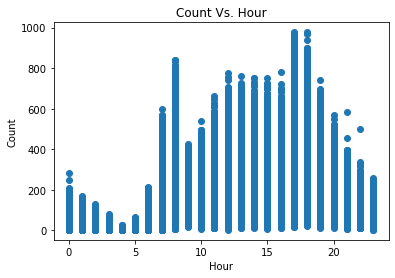

In [29]:
#Scatter plot for Count Vs. Hour

plt.scatter(inp2.hr,inp2.cnt)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Count Vs. Hour')
plt.show()

##### Scatter plot for Count Vs. Hour Insight: Number of bike rides are more 17,18 hours of the day

#### 7.2. Make boxplot for cnt vs. weekday
#### 7.2.1. Is there any difference in the rides by days of the week?

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

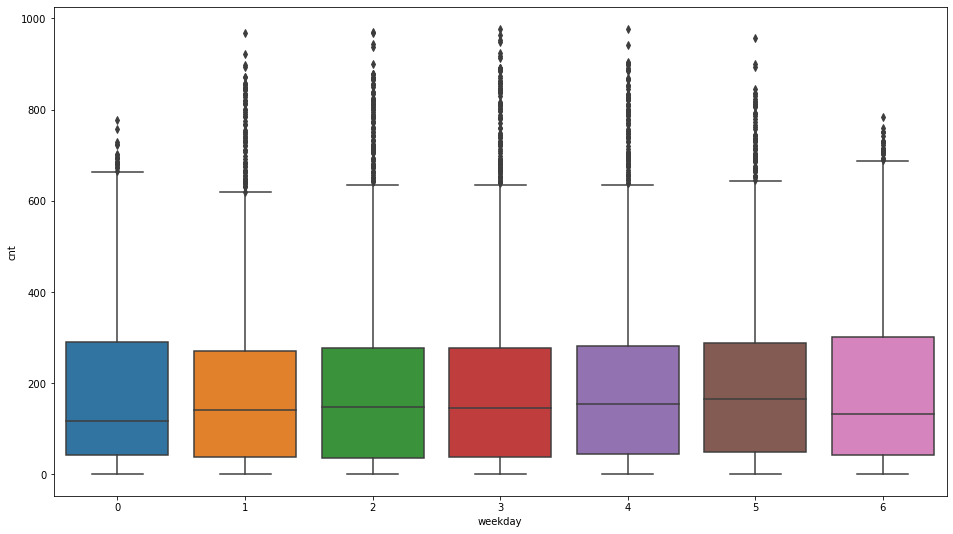

In [30]:
#Box Plot for Count Vs. Weekday
plt.rcParams['figure.figsize'] = (16,9)
sns.boxplot(x=inp2.weekday,y=inp2.cnt)

##### Yes there are slight difference in the rides of the bikes during weekdays

#### 7.3. Make boxplot for cnt vs. month
#### 7.3.1. Look at the median values. Any month(s) that stand out?

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

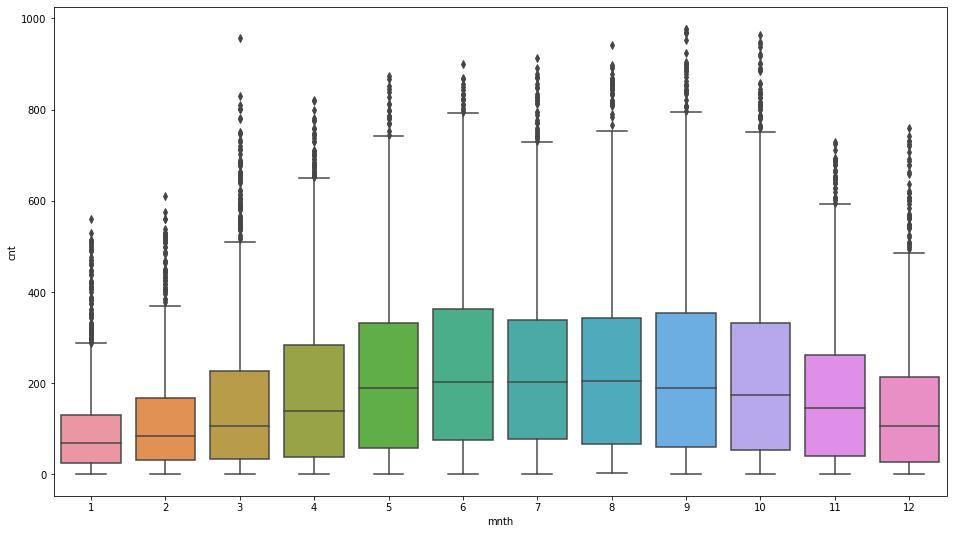

In [31]:
#Box Plot for Count Vs. Month

sns.boxplot(x=inp2.mnth,y=inp2.cnt)

##### No of bike rides were low during Jan, feb, Dec. No of bikes are high during June, July, Aug

#### 7.4. Make boxplot for cnt vs. season
#### 7.4.1. Which season has the highest rides in general? Expected?

<AxesSubplot:xlabel='season', ylabel='cnt'>

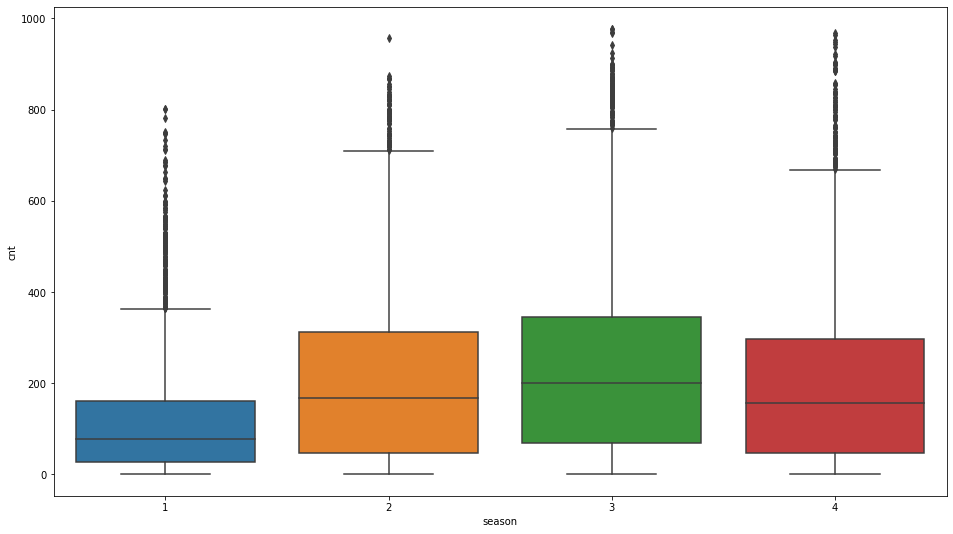

In [32]:
#Box Plot for Count Vs. Season

sns.boxplot(x=inp2.season,y=inp2.cnt)

##### Bike rides were more during Fall when compared to the other seasons of the year

#### 7.5.Make a bar plot with the median value of cnt for each hr
#### 7.5.1. Does this paint a different picture from the box plot?

<BarContainer object of 17221 artists>

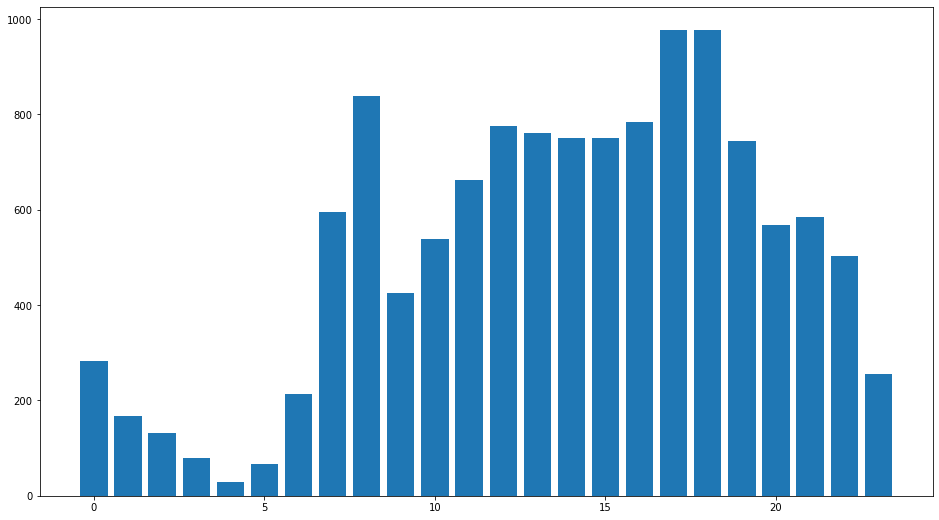

In [33]:
#view barplot for Count Vs Hour

plt.bar(inp2.hr, inp2.cnt)

##### No, bar plot looks simillar to the box plot.

#### 7.6. Make a correlation matrix for variables atemp, temp, hum, and windspeed
#### 7.6.1. Which variables have the highest correlation?

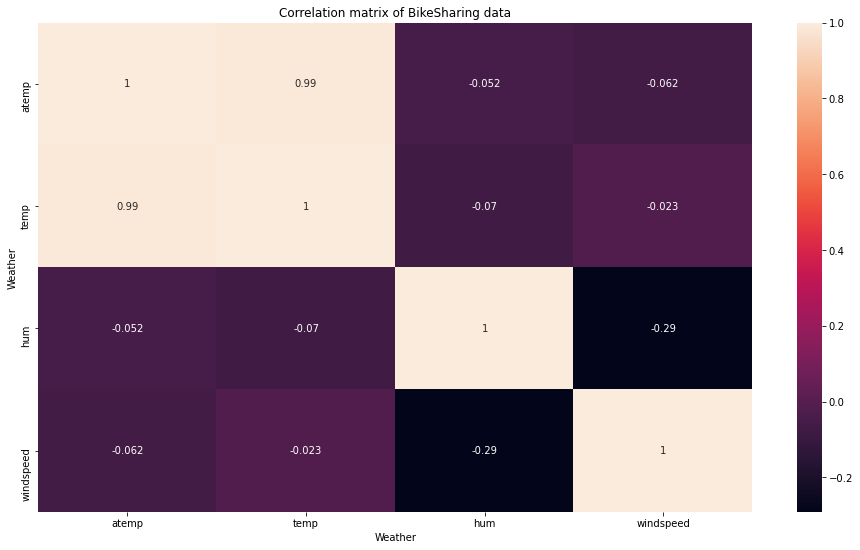

In [34]:
#view correlation matrix for the variables atemp,temp,hum,windspeed

corr_inp2 = inp2.loc[:,['atemp','temp','hum','windspeed']]
correlation_mat = corr_inp2.corr()
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of BikeSharing data")
plt.xlabel("Weather")
plt.ylabel("Weather")
plt.show()

##### atemp and temp has the highest correlation

#### 8. Data preprocessing
##### 8.1. Treating mnth column
##### 8.1.1. For values 5,6,7,8,9,10, replace with a single value 5. This is because these have very similar values for cnt.

In [35]:
#Replace the values 5,6,7,8,9,10,11,12 as 5 in the column month.

inp2.loc[(inp2.mnth >= 5), 'mnth'] = 5
inp2

C:\Users\jeeva\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,5,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,5,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,5,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,5,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


##### 8.1.2. Get dummies for the updated 6 mnth values

In [36]:
# Create dummy columns for 6 month values

inp2 = pd.get_dummies(inp2,prefix_sep='_',columns = ['mnth'])
inp2

,season,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5
0,1,0,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16,1,0,0,0,0
1,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,1,0,0,0,0
2,1,0,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32,1,0,0,0,0
3,1,0,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13,1,0,0,0,0
6,1,0,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119,0,0,0,0,1
17375,1,1,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89,0,0,0,0,1
17376,1,1,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90,0,0,0,0,1
17377,1,1,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61,0,0,0,0,1


#### 8.2.Treating hr column
##### 8.2.1.Create new mapping: 0-5: 0, 11-15: 11; other values are untouched. Again, the bucketing is done in a way that hr values with similar levels of cnt are treated the same.

In [37]:
#create bins for the hour

bins = np.linspace((min(inp2.hr)),max(inp2.hr),5)

In [38]:
#create the bin names for the bins created

group_names = ['0','6','11','16']

In [39]:
#group the hour data into created bins

inp2['hr_bin'] = pd.cut(inp2['hr'],bins,labels = group_names,include_lowest=True)
inp2

,season,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,hr_bin
0,1,0,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16,1,0,0,0,0,0
1,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,1,0,0,0,0,0
2,1,0,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32,1,0,0,0,0,0
3,1,0,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13,1,0,0,0,0,0
6,1,0,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,1,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119,0,0,0,0,1,16
17375,1,1,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89,0,0,0,0,1,16
17376,1,1,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90,0,0,0,0,1,16
17377,1,1,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61,0,0,0,0,1,16


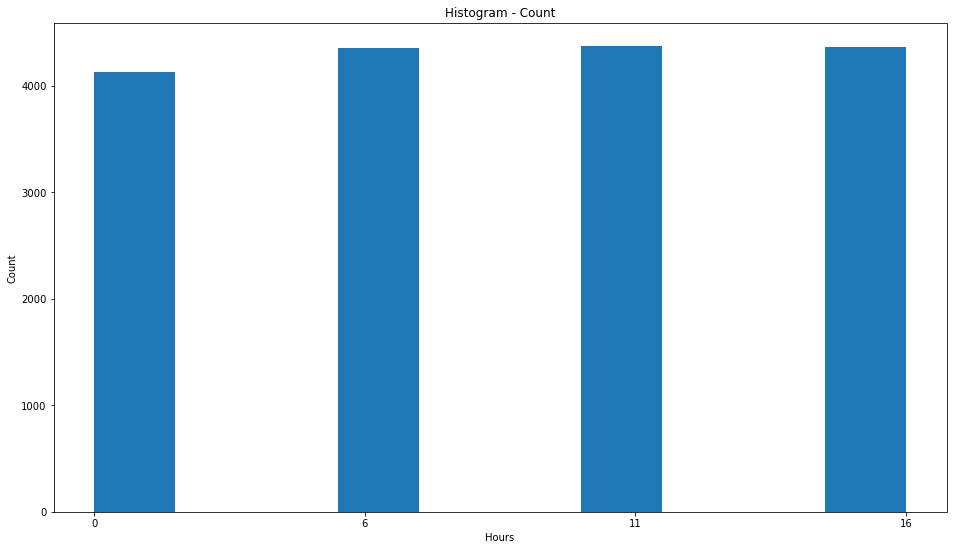

In [40]:
#Histogram for count with the hour bins created

plt.title('Histogram - Count')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.hist(inp2.hr_bin)
plt.show()

##### 8.3.Get dummy columns for season, weathersit, weekday, mnth, and hr. You needn’t club these further as the levels seem to have different values for the median cnt, when seen from the box plots.

In [41]:
# Create dummy columns for season, weathersit, weekday, mnth, hr.

inp2 = pd.get_dummies(inp1,prefix_sep='_',columns = ['season','weathersit','weekday','mnth','hr'])
inp2

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0,0.24,0.2879,0.81,0.0000,16,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0000,40,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0000,32,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0000,13,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0000,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.2576,0.60,0.1642,119,1,0,...,0,0,0,0,0,1,0,0,0,0
17375,1,0,1,0.26,0.2576,0.60,0.1642,89,1,0,...,0,0,0,0,0,0,1,0,0,0
17376,1,0,1,0.26,0.2576,0.60,0.1642,90,1,0,...,0,0,0,0,0,0,0,1,0,0
17377,1,0,1,0.26,0.2727,0.56,0.1343,61,1,0,...,0,0,0,0,0,0,0,0,1,0


##### 10. Separate X and Y for df_train and df_test. For example, you should have X_train, y_train from df_train. y_train should be the cnt column from inp3 and X_train should be all other columns.

In [42]:
# Split the dataframe for X

X = pd.DataFrame(inp2.drop(['cnt'],axis=1))
X

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0,0.24,0.2879,0.81,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.2576,0.60,0.1642,1,0,0,...,0,0,0,0,0,1,0,0,0,0
17375,1,0,1,0.26,0.2576,0.60,0.1642,1,0,0,...,0,0,0,0,0,0,1,0,0,0
17376,1,0,1,0.26,0.2576,0.60,0.1642,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17377,1,0,1,0.26,0.2727,0.56,0.1343,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
# Split the dataframe for Y

Y = inp2['cnt']
Y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

#### 9.Train test split: Apply 70-30 split.
##### - call the new dataframes df_train and df_test

In [44]:
#Split the dataframe into 70-30 split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X,Y,test_size=.30)

In [45]:
# View the number of records in the training data and test data

print("Shape of original dataset :", inp2.shape)
print("Shape of Input - training set 'x_train' :", x_train.shape)
print("Shape of Input - testing set 'x_test' :", x_test.shape)
print("Shape of Output - training set 'y_train' :", y_train.shape)
print("Shape of Output - testing set 'y_test' :", y_test.shape)

Shape of original dataset : (17379, 59)
Shape of Input - training set 'x_train' : (12165, 58)
Shape of Input - testing set 'x_test' : (5214, 58)
Shape of Output - training set 'y_train' : (12165,)
Shape of Output - testing set 'y_test' : (5214,)


In [46]:
#View the Records in the Training data

df_train = pd.concat([x_train,pd.DataFrame(y_train,columns=['Rating'])],axis=1)
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,Rating
17175,1,0,0,0.22,0.2273,0.64,0.1940,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
113,0,0,1,0.18,0.1970,0.55,0.1343,1,0,0,...,0,0,0,0,0,0,0,1,0,NaN
33,0,0,0,0.36,0.3485,0.81,0.2239,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
17308,1,0,0,0.24,0.2424,0.75,0.0896,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
416,0,0,1,0.24,0.2576,0.93,0.1045,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0,0,0,0.18,0.2424,0.80,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9087,1,0,1,0.22,0.2121,0.47,0.2836,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
159,0,0,1,0.18,0.1970,0.43,0.1642,1,0,0,...,0,0,0,0,0,0,0,1,0,NaN
12763,1,0,1,0.74,0.6970,0.70,0.0896,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN


In [47]:
# View the number of records in the training dataframe

df_train.shape

(12165, 59)

In [48]:
#View the Records in the Test data

df_test = pd.concat([x_test,pd.DataFrame(y_test,columns=['Rating'])],axis=1)
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,Rating
7073,0,0,1,0.48,0.4697,0.88,0.1940,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4378,0,0,1,0.72,0.6970,0.74,0.1045,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
17168,1,0,0,0.20,0.2121,0.51,0.1343,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
12455,1,0,1,0.52,0.5000,0.63,0.0000,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
2262,0,0,0,0.30,0.2879,1.00,0.2537,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0,0,1,0.26,0.2273,0.41,0.3881,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
5742,0,0,1,0.72,0.6667,0.54,0.2537,0,0,1,...,0,0,1,0,0,0,0,0,0,NaN
9772,1,0,1,0.28,0.2879,0.93,0.1045,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
13601,1,0,1,0.70,0.6515,0.58,0.1343,0,0,1,...,0,0,0,0,0,0,0,1,0,NaN


In [49]:
#View the number of records in the test dataframe

df_test.shape

(5214, 59)

#### 10 . Model building
##### 10.1. Use linear regression as the technique

In [50]:
# Building model on training data

from sklearn.linear_model import LinearRegression
Model_Training_Data = LinearRegression().fit(x_train,y_train)

#### 11. Make predictions on test set and report R2.

In [51]:
# Using the Model build on the Training data making predictions on test data

Predicted_values = Model_Training_Data.predict(x_test)

In [52]:
#View the length of Test data - X_test

len(x_test)

5214

In [53]:
#View the length of Predicted values

len(Predicted_values)

5214

In [54]:
#Based on the Model build on training data. Predicted the rating for the apps in the test data and combined in a single dataframe.

df_test = pd.concat([x_test.reset_index(drop=True),y_test.reset_index(drop=True),pd.DataFrame(Predicted_values,columns=['Pred_Cnt'])],axis=1)
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,cnt,Pred_Cnt
0,0,0,1,0.48,0.4697,0.88,0.1940,0,0,0,...,0,0,0,0,0,0,0,0,316,289.886719
1,0,0,1,0.72,0.6970,0.74,0.1045,0,0,1,...,0,0,0,0,0,0,0,0,428,355.132812
2,1,0,0,0.20,0.2121,0.51,0.1343,1,0,0,...,0,0,0,0,0,0,0,0,9,-40.863281
3,1,0,1,0.52,0.5000,0.63,0.0000,0,1,0,...,0,0,0,0,0,0,0,0,10,94.898438
4,0,0,0,0.30,0.2879,1.00,0.2537,0,1,0,...,0,0,0,0,0,0,0,0,14,-142.410156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,0,0,1,0.26,0.2273,0.41,0.3881,1,0,0,...,0,0,0,0,0,0,0,0,69,56.796875
5210,0,0,1,0.72,0.6667,0.54,0.2537,0,0,1,...,0,1,0,0,0,0,0,0,628,487.640625
5211,1,0,1,0.28,0.2879,0.93,0.1045,1,0,0,...,0,0,0,0,0,0,0,0,1,-33.566406
5212,1,0,1,0.70,0.6515,0.58,0.1343,0,0,1,...,0,0,0,0,0,0,1,0,278,215.917969


In [55]:
#View the Error Percentage for the test data

df_test['Err_pct'] = abs(df_test.cnt-df_test.Pred_Cnt)/df_test.cnt
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,cnt,Pred_Cnt,Err_pct
0,0,0,1,0.48,0.4697,0.88,0.1940,0,0,0,...,0,0,0,0,0,0,0,316,289.886719,0.082637
1,0,0,1,0.72,0.6970,0.74,0.1045,0,0,1,...,0,0,0,0,0,0,0,428,355.132812,0.170250
2,1,0,0,0.20,0.2121,0.51,0.1343,1,0,0,...,0,0,0,0,0,0,0,9,-40.863281,5.540365
3,1,0,1,0.52,0.5000,0.63,0.0000,0,1,0,...,0,0,0,0,0,0,0,10,94.898438,8.489844
4,0,0,0,0.30,0.2879,1.00,0.2537,0,1,0,...,0,0,0,0,0,0,0,14,-142.410156,11.172154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,0,0,1,0.26,0.2273,0.41,0.3881,1,0,0,...,0,0,0,0,0,0,0,69,56.796875,0.176857
5210,0,0,1,0.72,0.6667,0.54,0.2537,0,0,1,...,1,0,0,0,0,0,0,628,487.640625,0.223502
5211,1,0,1,0.28,0.2879,0.93,0.1045,1,0,0,...,0,0,0,0,0,0,0,1,-33.566406,34.566406
5212,1,0,1,0.70,0.6515,0.58,0.1343,0,0,1,...,0,0,0,0,0,1,0,278,215.917969,0.223317


In [56]:
# Accuracy rate
Accracy_rate = 1 - np.mean(df_test.Err_pct)
print("Accracy rate : ",Accracy_rate)
Accuracy_Percentage = "{:.0%}".format(Accracy_rate)
print("Accuracy Percentage : ",Accuracy_Percentage)

Accracy rate :  -1.937032588300196
Accuracy Percentage :  -194%


In [57]:
#R2 on Test Data

from sklearn.metrics import r2_score
R2_on_test_data =  r2_score(y_test,Predicted_values)
print("R2 on test data : ", R2_on_test_data)
R2_on_test_data_percentage =  "{:.0%}".format(R2_on_test_data)
print("R2 on test data Percentage : ", R2_on_test_data_percentage)

R2 on test data :  0.6939832046573661
R2 on test data Percentage :  69%


##### 10.2 Report the R2 on the train set

In [58]:
# Using the Model build on the Training data after testin on the test data - making predictions on training data

Predicted_values_train = Model_Training_Data.predict(x_train)

In [59]:
# View R2 on Training Data

R2_percentage = "{:.0%}".format(r2_score(y_train,Predicted_values_train))
print("R2 on Training Data percentage : ",R2_percentage)

R2 on Training Data percentage :  68%
